
## Importação dos Pacotes


In [18]:
# Importação dos pacotes
import requests
import pandas as pd
import json  
from pandas.io.json import json_normalize  
import mysql.connector
from mysql.connector import Error
import csv
import os
import re
import requests
# Pacote para importação das imagens
from IPython.display import Image
from IPython.core.display import HTML 
# Importação dos pacotes para gerar os graficos da tabela deputados
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Importação do pacote para criar os widgets 
import ipywidgets

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.1


##  Conexão com o Banco De Dados MySQL

In [22]:
# Cria a conexão
conn = mysql.connector.connect(host='localhost',
                               database='dadosaberto',
                               user='root',
                               password='ml2009160473')
if conn.is_connected():
    db_Info = conn.get_server_info()
    print("Conectado à versão do servidor MySQL ", db_Info)
    cur = conn.cursor()
    cur.execute("select database();")
    record = cur.fetchone()
    print("Você está conectado ao banco de dados: ", record)
    
else:
    print("Erro ao conectar ao MySQL!")

Conectado à versão do servidor MySQL  5.7.21-log
Você está conectado ao banco de dados:  ('dadosaberto',)


## widgets para seleção dos parâmetros da pesquisa

### Selecione o nome do deputado 

In [4]:
# No Dados Abertos, cada deputado que exerceu mandato, por um só dia que seja, recebe um número identificador exclusivo.
# Seleção do identificador
dict_id ={'Abílio Santana': 204554, 'Abou Anni': 204521, 'Acácio Favacho': 204379, 'Adolfo Viana': 204560, 'Adriana Ventura': 204528, 'Adriano do Baldy': 121948, 'Aécio Neves': 74646, 'Afonso Florence': 160508, 'Afonso Hamm': 136811, 'Afonso Motta': 178835, 'Aguinaldo Ribeiro': 160527, 'Airton Faleiro': 204495, 'AJ Albuquerque': 204549, 'Alan Rick': 178836, 'Alceu Moreira': 160559, 'Alcides Rodrigues': 204413, 'Alê Silva': 204545, 'Alencar Santana Braga': 204501, 'Alessandro Molon': 160511, 'Alex Manente': 178972, 'Alex Santana': 204571, 'Alexandre Frota': 204544, 'Alexandre Leite': 160545, 'Alexandre Padilha': 204503, 'Alexandre Serfiotis': 178833, 'Alexis Fonteyne': 204516, 'Alice Portugal': 74057, 'Aliel Machado': 178927, 'Aline Gurgel': 204353, 'Aline Sleutjes': 204400, 'Aluisio Mendes': 178881, 'Amaro Neto': 204356, 'André Abdon': 178831, 'André de Paula': 74471, 'André Ferreira': 204423, 'André Figueiredo': 133439, 'André Fufuca': 178882, 'André Janones': 204515, 'Angela Amin': 73696, 'Antonio Brito': 160553, 'Arlindo Chinaglia': 73433, 'Arnaldo Jardim': 141391, 'Aroldo Martins': 204414, 'Arthur Lira': 160541, 'Arthur Oliveira Maia': 160600, 'Assis Carvalho': 159237, 'Átila Lins': 74090, 'Átila Lira': 74459, 'Augusto Coutinho': 160665, 'Áurea Carolina': 204509, 'Aureo Ribeiro': 160512, 'Bacelar': 69871, 'Baleia Rossi': 178975, 'Benedita da Silva': 73701, 'Benes Leocádio': 109429, 'Beto Faro': 141335, 'Beto Pereira': 204358, 'Beto Rosado': 178948, 'Bia Cavassa': 207176, 'Bia Kicis': 204374, 'Bibo Nunes': 204388, 'Bilac Pinto': 141513, 'Bira do Pindaré': 204561, 'Boca Aberta': 204397, 'Bohn Gass': 160538, 'Bosco Costa': 74052, 'Bosco Saraiva': 204551, 'Bruna Furlan': 160589, 'Cacá Leão': 93083, 'Camilo Capiberibe': 204352, 'Capitão Alberto Neto': 204572, 'Capitão Augusto': 178829, 'Capitão Fábio Abreu': 178924, 'Capitão Wagner': 204487, 'Carla Dickson': 21376, 'Carla Zambelli': 204507, 'Carlos Bezerra': 141401, 'Carlos Chiodini': 204361, 'Carlos Gomes': 178962, 'Carlos Henrique Gaguim': 178993, 'Carlos Jordy': 204460, 'Carlos Sampaio': 74262, 'Carlos Veras': 204426, 'Carlos Zarattini': 141398, 'Carmen Zanotto': 164360, 'Caroline de Toni': 204369, 'Cássio Andrade': 204499, 'Célio Moura': 204370, 'Célio Silveira': 178876, 'Célio Studart': 204488, 'Celso Maldaner': 141405, 'Celso Russomanno': 73441, 'Celso Sabino': 204496, 'Cezinha de Madureira': 204504, 'Charles Fernandes': 205476, 'Charlles Evangelista': 204490, 'Chico DAngelo': 141439, 'Chiquinho Brazão': 204476, 'Chris Tonietto': 204462, 'Christiane de Souza Yared': 178928, 'Christino Aureo': 204440, 'Clarissa Garotinho': 178939, 'Claudio Cajado': 74537, 'Cleber Verde': 141408, 'Coronel Armando': 204376, 'Coronel Chrisóstomo': 204378, 'Coronel Tadeu': 204514, 'Cristiano Vale': 135054, 'Da Vitoria': 204355, 'Dagoberto Nogueira': 141411, 'Damião Feliciano': 74467, 'Daniel Almeida': 74060, 'Daniel Coelho': 178916, 'Daniel Freitas': 204367, 'Daniel Silveira': 204454, 'Daniel Trzeciak': 204409, 'Daniela do Waguinho': 204459, 'Danilo Cabral': 160528, 'Danilo Forte': 62881, 'Danrlei de Deus Hinterholz': 160552, 'Darci de Matos': 116379, 'David Miranda': 205548, 'David Soares': 204511, 'Delegado Antônio Furtado': 204451, 'Delegado Éder Mauro': 178908, 'Delegado Marcelo Freitas': 204512, 'Delegado Pablo': 204569, 'Delegado Waldir': 164359, 'Denis Bezerra': 204542, 'Diego Andrade': 160588, 'Diego Garcia': 178929, 'Dimas Fabiano': 160599, 'Domingos Neto': 143632, 'Domingos Sávio': 160758, 'Dr. Frederico': 204518, 'Dr. Jaziel': 204481, 'Dr. João': 213679, 'Dr. Leonardo': 204439, 'Dr. Luiz Antonio Teixeira Jr.': 204450, 'Dr. Luiz Ovando': 204351, 'Dr. Sinval Malheiros': 178830, 'Dr. Zacharias Calil': 204412, 'Dra. Soraya Manato': 81297, 'Dra. Vanda Milani': 204434, 'Dulce Miranda': 178994, 'Edilázio Júnior': 204562, 'Edio Lopes': 141417, 'Edmilson Rodrigues': 134812, 'Edna Henrique': 204421, 'Eduardo Barbosa': 74655, 'Eduardo Bismarck': 204541, 'Eduardo Bolsonaro': 92346, 'Eduardo Braide': 204552, 'Eduardo Costa': 204500, 'Eduardo Cury': 178977, 'Eduardo da Fonte': 141421, 'Efraim Filho': 141422, 'Elcione Barbalho': 74075, 'Eli Borges': 204364, 'Eli Corrêa Filho': 160532, 'Elias Vaz': 204389, 'Elmar Nascimento': 178854, 'Emanuel Pinheiro Neto': 198783, 'Emidinho Madeira': 161550, 'Enéias Reis': 207309, 'Enio Verri': 132504, 'Enrico Misasi': 204537, 'Erika Kokay': 160575, 'Eros Biondini': 160640, 'Euclydes Pettersen': 204482, 'Evair Vieira de Melo': 178871, 'Expedito Netto': 178953, 'Fábio Henrique': 68720, 'Fábio Mitidieri': 178969, 'Fábio Ramalho': 141427, 'Fabio Reis': 171623, 'Fabio Schiochet': 204368, 'Fábio Trad': 160587, 'Fausto Pinato': 66828, 'Felício Laterça': 204477, 'Felipe Carreras': 72442, 'Felipe Francischini': 204398, 'Felipe Rigoni': 204371, 'Félix Mendonça Júnior': 160666, 'Fernanda Melchionna': 204407, 'Fernando Coelho Filho': 141431, 'Fernando Monteiro': 92699, 'Fernando Rodolfo': 204427, 'Filipe Barros': 204411, 'Flávia Arruda': 204354, 'Flávia Morais': 160598, 'Flaviano Melo': 141434, 'Flávio Nogueira': 191923, 'Flordelis': 204447, 'Francisco Jr.': 204392, 'Franco Cartafina': 204510, 'Fred Costa': 204494, 'Frei Anastacio Ribeiro': 204393, 'Gastão Vieira': 74200, 'Gelson Azevedo': 115746, 'Genecias Noronha': 160669, 'General Girão': 204473, 'General Peternelli': 204484, 'Geninho Zuliani': 204527, 'Geovania de Sá': 178966, 'Gervásio Maia': 204394, 'Giacobo': 74383, 'Gil Cutrim': 204575, 'Gilberto Abramo': 204491, 'Gilberto Nascimento': 74270, 'Gildenemyr': 204570, 'Gilson Marques': 204365, 'Giovani Cherini': 160673, 'Giovani Feltes': 178996, 'Glauber Braga': 152605, 'Glaustin Fokus': 204419, 'Gleisi Hoffmann': 107283, 'Gonzaga Patriota': 74419, 'Greyce Elias': 198197, 'Guiga Peixoto': 204513, 'Guilherme Derrite': 204531, 'Guilherme Mussi': 160667, 'Gurgel': 204442, 'Gustavo Fruet': 73460, 'Gustinho Ribeiro': 204408, 'Gutemberg Reis': 204456, 'Haroldo Cathedral': 204465, 'Heitor Freire': 204548, 'Heitor Schuch': 178964, 'Helder Salomão': 178873, 'Hélio Costa': 204373, 'Hélio Leite': 178909, 'Helio Lopes': 204444, 'Henrique Fontana': 73482, 'Hercílio Coelho Diniz': 204539, 'Herculano Passos': 178981, 'Hermes Parcianello': 73772, 'Hildo Rocha': 178884, 'Hiran Gonçalves': 178959, 'Hugo Leal': 141450, 'Hugo Motta': 160674, 'Idilvan Alencar': 204533, 'Igor Kannário': 204564, 'Igor Timo': 204508, 'Iracema Portella': 67138, 'Isnaldo Bulhões Jr.': 204436, 'Ivan Valente': 73531, 'Jandira Feghali': 74848, 'Jaqueline Cassol': 108338, 'Jefferson Campos': 74273, 'Jerônimo Goergen': 160570, 'Jéssica Sales': 178839, 'Jesus Sérgio': 204435, 'Jhc': 178842, 'Jhonatan de Jesus': 160531, 'João Campos': 74366, 'João Carlos Bacelar': 141458, 'João Daniel': 178970, 'João H. Campos': 204429, 'João Maia': 141459, 'João Marcelo Souza': 112437, 'João Roma': 204576, 'Joaquim Passarinho': 178910, 'Joenia Wapichana': 204468, 'Joice Hasselmann': 204546, 'Jorge Braz': 205550, 'Jorge Solla': 178857, 'José Airton Félix Cirilo': 141464, 'José Guimarães': 141470, 'Jose Mario Schreiner': 204386, 'José Medeiros': 204472, 'José Nelto': 204391, 'José Nunes': 160619, 'José Priante': 74079, 'José Ricardo': 204555, 'José Rocha': 74554, 'Joseildo Ramos': 209189, 'Josimar Maranhãozinho': 204563, 'Juarez Costa': 204474, 'Julian Lemos': 204420, 'Julio Cesar Ribeiro': 204372, 'Júlio Cesar': 74317, 'Júlio Delgado': 73586, 'Juninho do Pneu': 204457, 'Junio Amaral': 204520, 'Júnior Bozzella': 204502, 'Júnior Ferrari': 204497, 'Junior Lourenço': 204574, 'Júnior Mano': 204550, 'Juscelino Filho': 178886, 'Kim Kataguiri': 204536, 'Laercio Oliveira': 151208, 'Lafayette de Andrada': 98057, 'Lauriete': 160534, 'Leandre': 178832, 'Leda Sadala': 204375, 'Léo Moraes': 204359, 'Léo Motta': 204547, 'Leonardo Monteiro': 74156, 'Leônidas Cristino': 74299, 'Leur Lomanto Júnior': 92102, 'Lídice da Mata': 139285, 'Lincoln Portela': 74585, 'Liziane Bayer': 204405, 'Loester Trutis': 204382, 'Lourival Gomes': 196358, 'Lucas Gonzalez': 204523, 'Lucas Redecker': 204404, 'Lucas Vergilio': 178879, 'Luciano Bivar': 74478, 'Luciano Ducci': 178931, 'Lucio Mosquini': 178954, 'Luis Miranda': 204381, 'Luis Tibé': 160510, 'Luisa Canziani': 204410, 'Luiz Antônio Corrêa': 204448, 'Luiz Carlos Motta': 204485, 'Luiz Carlos': 160645, 'Luiz Lima': 204455, 'Luiz Nishimori': 162332, 'Luiz Philippe de Orleans e Bragança': 204526, 'Luiza Erundina': 74784, 'Luizão Goulart': 204418, 'Luizianne Lins': 178866, 'Magda Mofatto': 166402, 'Major Fabiana': 204458, 'Manuel Marcos': 204469, 'Mara Rocha': 204471, 'Marcão Gomes': 212749, 'Marcel van Hattem': 156190, 'Marcelo Aro': 146788, 'Marcelo Brum': 205863, 'Marcelo Calero': 204433, 'Marcelo Freixo': 76874, 'Marcelo Moraes': 133810, 'Marcelo Nilo': 204558, 'Marcelo Ramos': 204556, 'Marcio Alvino': 178983, 'Márcio Biolchi': 179001, 'Márcio Jerry': 81055, 'Márcio Labre': 204452, 'Márcio Marinho': 150418, 'Marco Bertaiolli': 204522, 'Marcon': 160535, 'Marcos Aurélio Sampaio': 204431, 'Marcos Pereira': 204506, 'Margarete Coelho': 204430, 'Margarida Salomão': 171619, 'Maria do Rosário': 74398, 'Maria Rosas': 204540, 'Mariana Carvalho': 178956, 'Marília Arraes': 204428, 'Marina Santos': 204432, 'Mário Heringer': 74158, 'Mário Negromonte Jr.': 178858, 'Marlon Santos': 204403, 'Marreca Filho': 204566, 'Marx Beltrão': 178843, 'Maurício Dziedricki': 75431, 'Mauro Benevides Filho': 204486, 'Mauro Lopes': 74749, 'Mauro Nazif': 141508, 'Miguel Lombardi': 178985, 'Milton Vieira': 154178, 'Misael Varella': 178895, 'Moses Rodrigues': 178997, 'Natália Bonavides': 204453, 'Nelson Barbudo': 204449, 'Nereu Crispim': 204415, 'Neri Geller': 146307, 'Newton Cardoso Jr': 178896, 'Ney Leprevost': 204384, 'Nicoletti': 204479, 'Nilson Pinto': 74352, 'Nilto Tatto': 178986, 'Nivaldo Albuquerque': 194260, 'Norma Ayub': 66179, 'Odair Cunha': 74159, 'Olival Marques': 204498, 'Orlando Silva': 178987, 'Osires Damaso': 204363, 'Osmar Terra': 73692, 'Ossesio Silva': 204422, 'Otoni de Paula': 204441, 'Ottaci Nascimento': 204475,'Otto Alencar Filho': 204573,'Padre João': 160556, 'Pastor Eurico': 160642, 'Pastor Sargento Isidório': 204553, 'Patrus Ananias': 74160, 'Paula Belmonte': 204377, 'Paulão': 171617, 'Paulo Abi_Ackel': 141516, 'Paulo Azi': 178860, 'Paulo Bengtson': 204538, 'Paulo Eduardo Martins': 193726, 'Paulo Freire Costa': 160558, 'Paulo Ganime': 204461, 'Paulo Guedes': 204492, 'Paulo Magalhães': 74574, 'Paulo Pereira da Silva': 141518, 'Paulo Pimenta': 74400, 'Paulo Ramos': 133968, 'Paulo Teixeira': 141488, 'Pedro Augusto Bezerra': 90201, 'Pedro Cunha Lima': 178912, 'Pedro Lucas Fernandes': 122974, 'Pedro Lupion': 204395, 'Pedro Paulo': 122158, 'Pedro Uczai': 160604, 'Pedro Westphalen': 204406, 'Perpétua Almeida': 73943, 'Pinheirinho': 204524, 'Policial Katia Sastre': 204529, 'Pompeo de Mattos': 73486, 'Pr. Marco Feliciano': 160601, 'Professor Alcides': 204390, 'Professor Israel Batista': 204383, 'Professor Joziel': 204446, 'Professora Dayane Pimentel': 204565, 'Professora Dorinha Seabra Rezende': 160639, 'Professora Marcivania': 160641, 'Professora Rosa Neide': 204467, 'Rafael Motta': 178951, 'Raimundo Costa': 204567, 'Raul Henry': 141523, 'Reginaldo Lopes': 74161, 'Rejane Dias': 178925, 'Renildo Calheiros': 73801, 'Ricardo Barros': 73788, 'Ricardo Guidi': 204362, 'Ricardo Izar': 160655, 'Ricardo Silva': 213274, 'Ricardo Teobaldo': 178920, 'Robério Monteiro': 204489, 'Roberto Alves': 152610, 'Roberto de Lucena': 160653, 'Rodrigo Agostinho': 204530, 'Rodrigo Coelho': 204366, 'Rodrigo de Castro': 141531, 'Rodrigo Maia': 74693, 'Rogério Correia': 204480, 'Rogério Peninha Mendonça': 160651, 'Roman': 178930, 'Ronaldo Carletto': 178861, 'Rosana Valle': 204525, 'Rosangela Gomes': 178945, 'Rose Modesto': 204357, 'Rubens Bueno': 73466, 'Rubens Otoni': 74371, 'Rui Falcão': 73604, 'Ruy Carneiro': 160635, 'Sâmia Bomfim': 204535, 'Samuel Moreira': 178990, 'Sanderson': 204416, 'Santini': 90842, 'Sargento Fahur': 204387, 'Schiavinato': 204399, 'Sebastião Oliveira': 178921, 'Sérgio Brito': 73808, 'Sergio Souza': 178933, 'Sergio Toledo': 204438, 'Sergio Vidigal': 178874, 'Severino Pessoa': 204437, 'Shéridan': 178961, 'Sidney Leite': 204557, 'Silas Câmara': 74356, 'Silvia Cristina': 204360, 'Silvio Costa Filho': 204425, 'Soraya Santos': 178946, 'Sóstenes Cavalcante': 178947, 'Stefano Aguiar': 92776, 'Subtenente Gonzaga': 177282, 'Tabata Amaral': 204534, 'Tadeu Alencar': 178922, 'Tadeu Filippelli': 74806, 'Talíria Petrone': 204464, 'Ted Conti': 206231, 'Tereza Nelma': 204466, 'Tiago Dimas': 143084, 'Tiago Mitraud': 204519, 'Tiririca': 160976, 'Toninho Wandscheer': 178934, 'Túlio Gadêlha': 157130, 'Uldurico Junior': 178863, 'Vaidon Oliveira': 195866, 'Valdevan Noventa': 204385, 'Valmir Assunção': 160610, 'Vander Loubet': 74376, 'Vanderlei Macris': 141553, 'Vavá Martins': 204505, 'Vermelho': 204396, 'Vicentinho Júnior': 137070, 'Vicentinho': 74283, 'Vilson da Fetaemg': 204483, 'Vinicius Carvalho': 141555, 'Vinicius Farah': 204478, 'Vinicius Gurgel': 160591, 'Vinicius Poit': 204532, 'Vitor Hugo': 179587, 'Vitor Lippi': 178992, 'Waldenor Pereira': 160569, 'Walter Alves': 178952, 'Weliton Prado': 160518, 'Wellington Roberto': 74043, 'Wilson Santiago': 74044, 'Wladimir Garotinho': 204463, 'Wolney Queiroz': 74439, 'Zé Carlos': 178889, 'Zé Neto': 204559, 'Zé Silva': 160632, 'Zé Vitor': 204517, 'Zeca Dirceu': 160592}
dict = ipywidgets.Dropdown(
    options= dict_id,
    value= 204554,
    description='Ordem:',
)
display(dict)

Dropdown(description='Ordem:', options={'Abílio Santana': 204554, 'Abou Anni': 204521, 'Acácio Favacho': 20437…

### Selecione o ano da pesquisa

In [5]:

ano = ipywidgets.Dropdown(
    options= {'2017': 2017 ,'2018': 2018 ,'2019': 2019 ,'2020': 2020 },
    value= 2020,
    description='Ordem:',
)
display(ano)

Dropdown(description='Ordem:', index=3, options={'2017': 2017, '2018': 2018, '2019': 2019, '2020': 2020}, valu…

### Selecione o número da página 

In [6]:
# Número da página de resultados, a partir de 1, que se deseja obter com a requisição, 
# contendo o número de itens definido pelo parâmetro itens. Se omitido, assume o valor 1.
num_pag = ipywidgets.IntSlider(
    value=1,
    min=1,
    max=10,
    step=1,
    description='nº páginas:',
)

display(num_pag)

IntSlider(value=1, description='nº páginas:', max=10, min=1)

### Selcione o número máximo de itens na página

In [7]:
# Número máximo de itens na página que se deseja obter com esta requisição.
num_item = ipywidgets.IntSlider(
    value=1,
    min=1,
    max=100,
    step=1,
    description='nº itens:',
)

display(num_item)

IntSlider(value=1, description='nº itens:', min=1)

### Selecione o sentido da ordenação

In [8]:
# O sentido da ordenação: asc para A a Z , e desc para Z a A.
dict_asc_desc = {'ASC': 'ASC', 'DESC': 'DESC'}
ord = ipywidgets.Dropdown(
    options= dict_asc_desc ,
    value='ASC',
    description='Ordem:',
)
display(ord)

Dropdown(description='Ordem:', options={'ASC': 'ASC', 'DESC': 'DESC'}, value='ASC')

A url abaixo será gerada da seguinte forma:
    
- 1- Acesso ao site https://dadosabertos.camara.leg.br/api/v2/deputados/

- 2- Seleção dos filtros de pesquisa 

- 3- Então passamos a url para uma request.

Você pode executar o mesmo procedimento e customizar sua busca.

In [19]:
# Construção da url buscar a imagem do deputado no portal da Câmara dos Deputados
foto = Image(url= "https://www.camara.leg.br/internet/deputado/bandep/" + str(dict.value) + ".jpg", width=200, height=200)

In [20]:
# Foto do parlamentar
foto

### Consulta as informações do deputado armazenada no banco de dados

In [23]:
# Seleciona no banco de dados as informações do deputado selecionado
num_id = str(dict.value)
cur.execute("SELECT  nome, siglaPartido, siglaUf, EMAIL FROM deputados where id =" + num_id)
dados = cur.fetchall()
info_dep = pd.DataFrame(dados)
info_dep = info_dep.rename(columns={0:'Nome', 1:'Sigla', 2:'UF', 3:'E-mail'})
info_dep

,Nome,Sigla,UF,E-mail
0,Carla Zambelli,PSL,SP,dep.carlazambelli@camara.leg.br


In [24]:
# Fechar a conexão
cur.close()
conn.close()

## WordCloud dos Discursos

In [25]:
# Importação do pacote para wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from  PIL  import  Image 

A url abaixo será gerada da seguinte forma:
    
- 1- Acesso ao site https://dadosabertos.camara.leg.br/api/v2/deputados/

- 2- Seleção do nome do deputado nos filtros de pesquisa 

- 3- Então passamos a url para uma request que irá buscar as informações dos discusos.


In [26]:
discurso_page = "https://dadosabertos.camara.leg.br/api/v2/deputados/"+ str(dict.value) + "/discursos?dataInicio=2017-01-01&dataFim=2020-12-12&ordenarPor=dataHoraInicio&ordem=ASC&itens=1&pagina=10"

In [27]:
# Busca as informações com so parâmetros da url, e armazena no formato csv.
request = requests.get(discurso_page)
request_text = request.text
dados_disc = json.loads(request_text)
df_disc = pd.json_normalize(dados_disc, 'dados')
df_disc.to_csv('discurso.csv', header=True, index=False)

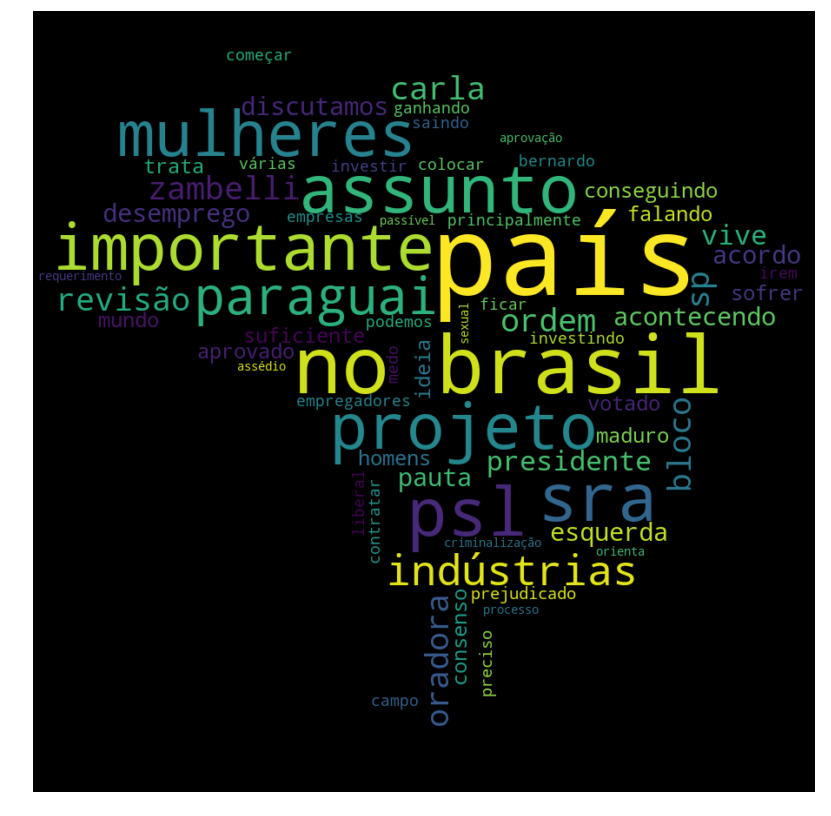

In [28]:
from wordcloud import WordCloud, STOPWORDS 
df = pd.read_csv(r"discurso.csv", encoding ="utf-8") 

# importar uma imagem para usar como máscara
mapa_mask  =  np . array ( Image.open( 'mapa.jpg' )) 

comment_words = '' 
stopwords = set(STOPWORDS) 
stopwords.update(["deputado","sr","são","venha","mim","dita","ex","a","ao","acerca","adeus","agora","ainda","alem","algmas","algo","algumas","alguns","ali","além","ambas","ambos","ano","anos","antes","aonde","apenas","apoio","apontar","apos","após","aquela","aquelas","aquele","aqueles","aqui","aquilo","as","assim","através","atrás","até","aí","baixo","bastante","bem","boa","boas","bom","bons","breve","cada","caminho","catorze","cedo","cento","certamente","certeza","cima","cinco","coisa","com","como","comprido","conhecido","conselho","contra","contudo","corrente","cuja","cujas","cujo","cujos","custa","cá","da","dão","daquela","daquelas","daquele","daqueles","dar","das","de","debaixo","dela","delas","dele","deles","demais","dentro","depois","desde","desligado","dessa","dessas","desse","desses","desta","destas","deste","destes","deve","devem","deverá","dez","dezanove","dezasseis","dezassete","dezoito","dia","diante","direita","dispoe","dispoem","diversa","diversas","diversos","diz","dizem","dizer","do","dois","dos","doze","duas","durante","dá","dúvida","e","ela","elas","ele","eles","em","embora","enquanto","entao","entre","então","era","eram","essa","essas","esse","esses","esta","estado","estamos","estar","estará","estas","estava","estavam","este","esteja","estejam","estejamos","estes","esteve","estive","estivemos","estiver","estivera","estiveram","estiverem","estivermos","estivesse","estivessem","estiveste","estivestes","estivéramos","estivéssemos","estou","está","estás","estávamos","estão","eu","exemplo","falta","fará","favor","faz","fazeis","fazem","fazemos","fazer","fazes","fazia","faço","fez","fim","final","foi","fomos","for","fora","foram","forem","forma","formos","fosse","fossem","foste","fostes","fui","fôramos","fôssemos","geral","grande","grandes","grupo","ha","haja","hajam","hajamos","havemos","havia","hei","hoje","hora","horas","houve","houvemos","houver","houvera","houveram","houverei","houverem","houveremos","houveria","houveriam","houvermos","houverá","houverão","houveríamos","houvesse","houvessem","houvéramos","houvéssemos","há","hão","iniciar","inicio","ir","irá","isso","ista","iste","isto","já","lado","lhe","lhes","ligado","local","logo","longe","lugar","lá","maior","maioria","maiorias","mais","mal","mas","me","mediante","meio","menor","menos","meses","mesma","mesmas","mesmo","mesmos","meu","meus","mil","minha","minhas","momento","muito","muitos","máximo","mês","na","nada","nao","naquela","naquelas","naquele","naqueles","nas","nem","nenhuma","nessa","nessas","nesse","nesses","nesta","nestas","neste","nestes","no","noite","nome","nos","nossa","nossas","nosso","nossos","nova","novas","nove","novo","novos","num","numa","numas","nunca","nuns","não","nível","nós","número","obra","obrigada","obrigado","oitava","oitavo","oito","onde","ontem","onze","os","ou","outra","outras","outro","outros","para","parece","parte","partir","paucas","pegar","pela","pelas","pelo","pelos","perante","perto","pessoas","pode","podem","poder","poderá","podia","pois","ponto","pontos","por","porque","porquê","portanto","posição","possivelmente","posso","possível","pouca","pouco","poucos","povo","primeira","primeiras","primeiro","primeiros","promeiro","propios","proprio","própria","próprias","próprio","próprios","próxima","próximas","próximo","próximos","puderam","pôde","põe","põem","quais","qual","qualquer","quando","quanto","quarta","quarto","quatro","que","quem","quer","quereis","querem","queremas","queres","quero","questão","quieto","quinta","quinto","quinze","quáis","quê","relação","sabe","sabem","saber","se","segunda","segundo","sei","seis","seja","sejam","sejamos","sem","sempre","sendo","ser","serei","seremos","seria","seriam","será","serão","seríamos","sete","seu","seus","sexta","sexto","sim","sistema","sob","sobre","sois","somente","somos","sou","sua","suas","sétima","sétimo","só","tal","talvez","tambem","também","tanta","tantas","tanto","tarde","te","tem","temos","tempo","tendes","tenha","tenham","tenhamos","tenho","tens","tentar","tentaram","tente","tentei","ter","terceira","terceiro","terei","teremos","teria","teriam","terá","terão","teríamos","teu","teus","teve","tinha","tinham","tipo","tive","tivemos","tiver","tivera","tiveram","tiverem","tivermos","tivesse","tivessem","tiveste","tivestes","tivéramos","tivéssemos","toda","todas","todo","todos","trabalhar","trabalho","treze","três","tu","tua","tuas","tudo","tão","tém","têm","tínhamos","um","uma","umas","uns","usa","usar","vai","vão","vais","valor","veja","vem","vens","ver","verdade","verdadeiro","vez","vezes","viagem","vindo","vinte","você","vocês","vos","vossa","vossas","vosso","vossos","vários","vêm","vós","zero","à","às","área","é","em","éramos","és","último"])

# iterar por meio do arquivo csv
for val in df.transcricao: 
      
    # digite cada val em string 
    val = str(val) 
  
    # dividir o valor
    tokens = val.split(',') 
      
    # Converte cada token em minúsculas 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 600, height = 800, 
                background_color ='#FFF0F5', 
                stopwords = stopwords,
                max_font_size=80,
                min_font_size = 8).generate(comment_words) 
  
#plot da imagem WordCloud                        
# Instanciar um objeto de nuvem de palavras
wordcloud = WordCloud(background_color='black', max_words=2000, mask=mapa_mask, stopwords=stopwords)

# Gerar a nuvem de palavras
wordcloud.generate(comment_words)

# Exibir a nuvem de palavras
fig = plt.figure()
fig.set_figwidth(14) # definir largura
fig.set_figheight(18) # definir altura

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()